Completed in December 2018

Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке от 1 до 15:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
![image](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/YzsaOcqaEeW9HA7NOZMxaw_3d529582665934cff77bbcf55a28e43c_image01.png?expiry=1591228800000&hmac=CnqGQiRzbiBsfKld2Qr_6x4-My2u6QTsHku01b4aOwE)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

![image](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/SLHK79HnEeWvxwo5BbZD3w_ed4fb0020ad6ccb0b2e2ea50468b7789_lineqn.png?expiry=1591228800000&hmac=itH3taS8WaL7Up5CkFlm-stI4gxSVH4DbUb6yPfiaj4)

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).


In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pylab as plt
%matplotlib inline

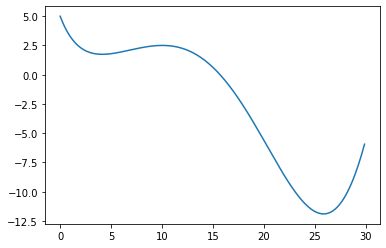

In [2]:
# Построим кубическую параболу
x = np.arange(0, 30, 0.1) # значения икс список от -10 до 10 с шагом 0.1
y = (np.sin(x / 5))*(np.exp(x / 10)) + 5*np.exp(-x / 2)
plt.plot(x, y)
plt.show()

In [3]:
# формула которая считает значения функции в определенной точке
def parabola_calculation(x): 
    return(np.sin(x / 5) * np.exp(x / 10)+(5 * np.exp(-x / 2)))

print ('Значения функции при разных икс:')
print ('при x = 0\t f(x)=', parabola_calculation(0))
print ('при x = 1\t f(x)=', parabola_calculation(1))
print ('при x = 4\t f(x)=', parabola_calculation(4))
print ('при x = 8\t f(x)=', parabola_calculation(8))
print ('при x = 10\t f(x)=', parabola_calculation(10))
print ('при x = 15\t f(x)=', parabola_calculation(15))


Значения функции при разных икс:
при x = 0	 f(x)= 5.0
при x = 1	 f(x)= 3.252216865271419
при x = 4	 f(x)= 1.7468459495903677
при x = 8	 f(x)= 2.316170159053224
при x = 10	 f(x)= 2.5054164070002463
при x = 15	 f(x)= 0.6352214195786656


[ 3.43914511 -0.18692825]
Проверка = 	 3.2522168652714187 0.6352214195786656
Должно быть:	 3.252216865271419 0.6352214195786656


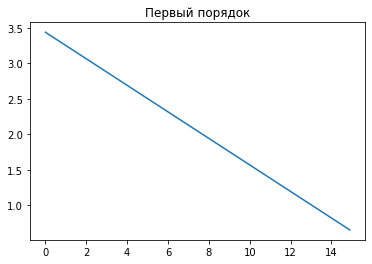

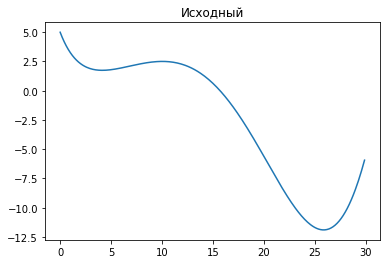

In [4]:
# Первый порядок w0 + w1x = f(x)
first = [1,15]
a1 = np.array([
    [first[0]**0, first[0]**1], 
    [first[1]**0, first[1]**1]]
)
b1 = np.array([parabola_calculation(first[0]), parabola_calculation(first[1])])
z1 = np.linalg.solve(a1, b1)
print (z1)
print ('Проверка = \t',z1[0]+z1[1], z1[0]+15*z1[1])
print ('Должно быть:\t', parabola_calculation(1), parabola_calculation(15))

x1 = np.arange(0, 15, 0.1) 
y1 = z1[0]+z1[1]*x1
plt.plot(x1, y1)
plt.title('Первый порядок')
plt.show()

plt.plot(x, y)
plt.title('Исходный')
plt.show()

[ 3.32512949 -0.06531159 -0.00760104]


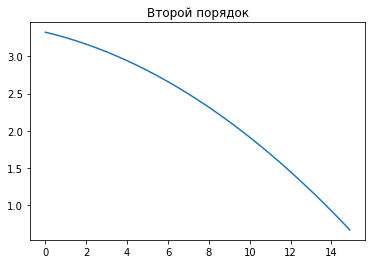

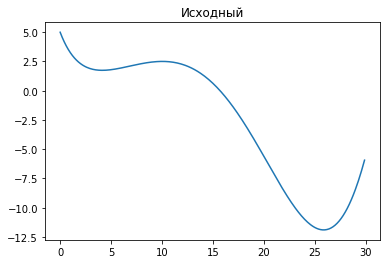

In [5]:
# Второй порядок w0 + w1x+w2x^2 = f(x)
second = [1,8,15]
a2 = np.array(
    [[second[0]**0, second[0]**1,second[0]**2],
     [second[1]**0, second[1]**1,second[1]**2],
     [second[2]**0, second[2]**1,second[2]**2]]
)
b2 = np.array([parabola_calculation(second[0]),parabola_calculation(second[1]), parabola_calculation(second[2])])
z2 = np.linalg.solve(a2, b2)
print (z2)

x2 = np.arange(0, 15, 0.1) 
y2 = z2[0]+z2[1]*x2+z2[2]*x2*x2
plt.plot(x2, y2)
plt.title('Второй порядок')
plt.show()

plt.plot(x, y)
plt.title('Исходный')
plt.show()

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


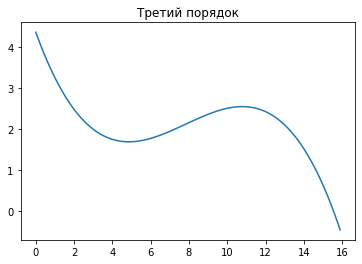

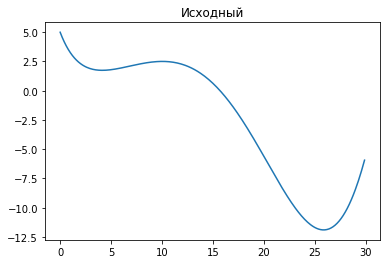

In [6]:
# Третий порядок w0 + w1x3+w2x3^2+w3x3^3 = f(x3)
third = [1,4,10,15]
a3 = np.array(
    [[third[0]**0,third[0]**1,third[0]**2,third[0]**3],
     [third[1]**0,third[1]**1,third[1]**2,third[1]**3],
     [third[2]**0,third[2]**1,third[2]**2,third[2]**3],
     [third[3]**0,third[3]**1,third[3]**2,third[3]**3]]
)

b3 = np.array([parabola_calculation(third[0]),parabola_calculation(third[1]), parabola_calculation(third[2]),parabola_calculation(third[3])])
z3 = np.linalg.solve(a3, b3)
print (z3)

x3 = np.arange(0, 16, 0.1) 
y3 = z3[0]+z3[1]*x3+z3[2]*x3**2+z3[3]*x3**3
plt.plot(x3, y3)
plt.title('Третий порядок')
plt.show()

plt.plot(x, y)
plt.title('Исходный')
plt.show()

In [7]:
with open('1.3. Functions approximation - answer.txt', 'a') as result:
    for k in z3:
        result.write(str(k.round(2))+' ')